In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
import seaborn as sns
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("./src/processed_home_prices.csv")
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180.000000,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,538000.0,3.0,2.25,2570.000000,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,180000.0,2.0,1.00,770.000000,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,604000.0,4.0,3.00,2090.976178,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,510000.0,3.0,2.00,1490.210641,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21597,360000.0,3.0,2.50,1530.000000,1131.0,3.0,0.0,0.0,3.0,8.0,1530.0,0.0,2009.0,0.0,98103.0,47.6993,-122.346,1530.0,1509.0
21598,400000.0,4.0,2.50,2310.000000,5813.0,2.0,0.0,0.0,3.0,8.0,2310.0,0.0,2014.0,0.0,98146.0,47.5107,-122.362,1830.0,7200.0
21599,402101.0,2.0,0.75,1020.000000,1350.0,2.0,0.0,0.0,3.0,7.0,1020.0,0.0,2009.0,0.0,98144.0,47.5944,-122.299,1020.0,2007.0
21600,400000.0,3.0,2.50,1600.000000,2388.0,2.0,0.0,0.0,3.0,8.0,1600.0,0.0,2004.0,0.0,98027.0,47.5345,-122.069,1410.0,1287.0


In [4]:
y = df['price']
X = df.drop(['price'], axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
def implementMlAlgorithm(alg):
    model = alg().fit(X_train, y_train)
    print("For " + alg.__name__, " pre RMSE: ", np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

In [7]:
algorithms = [LGBMRegressor, XGBRegressor,
              GradientBoostingRegressor, RandomForestRegressor,
              DecisionTreeRegressor, MLPRegressor,
              KNeighborsRegressor, SVR]

In [8]:
for algorithm in algorithms:
    implementMlAlgorithm(algorithm)

For LGBMRegressor  pre RMSE:  129050.72439849957
For XGBRegressor  pre RMSE:  126932.46391043892
For GradientBoostingRegressor  pre RMSE:  143008.87788012737
For RandomForestRegressor  pre RMSE:  138903.68256835855
For DecisionTreeRegressor  pre RMSE:  192608.918171828
For MLPRegressor  pre RMSE:  280646.78700597206
For KNeighborsRegressor  pre RMSE:  284168.7214514829
For SVR  pre RMSE:  413995.6797703963


# Nonlinear regression models

### KNeighborsRegressor

In [51]:
knn_params = {"n_neighbors": np.arange(1, 50, 1)}
knn_cv_model = GridSearchCV(KNeighborsRegressor(), knn_params, cv=10).fit(X_train, y_train)

In [13]:
knn_cv_model.best_params_

{'n_neighbors': 10}

In [52]:
tuned_knn = KNeighborsRegressor(n_neighbors=knn_cv_model.best_params_["n_neighbors"]).fit(X_train, y_train)

In [53]:
# RMSE
np.sqrt(mean_squared_error(y_test, tuned_knn.predict(X_test)))

281167.1034370162

In [27]:
# Cross validation RMSE
np.sqrt(np.mean(-cross_val_score(tuned_knn, X_test, y_test, cv=10, scoring="neg_mean_squared_error")))

281965.80101799744

### Classification And Regression Tree

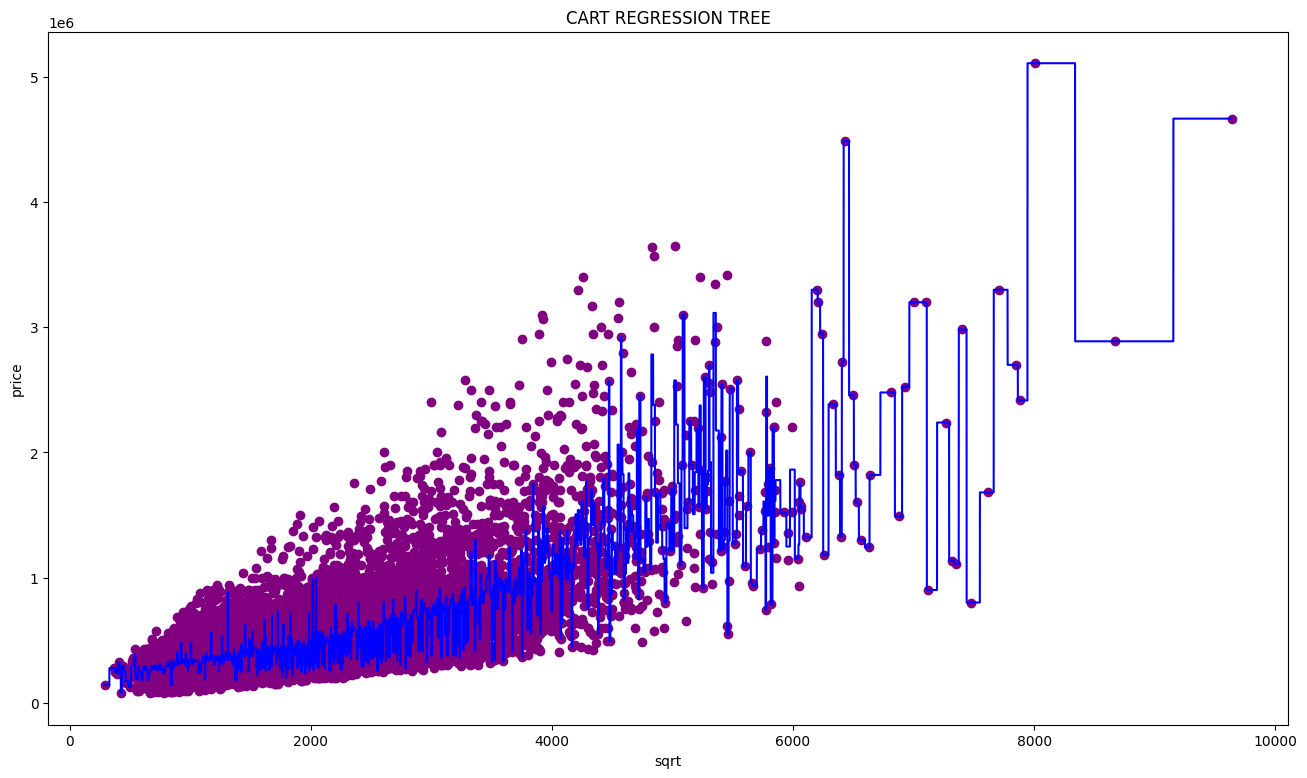

In [99]:
plt.figure(figsize=[16, 9])
plt.title('CART REGRESSION TREE')
plt.xlabel('sqrt')
plt.ylabel('price')

X_grid = np.arange(min(np.array(pd.DataFrame(X_train["sqft_living"]))),
                   max(np.array(pd.DataFrame(X_train["sqft_living"]))), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(pd.DataFrame(X_train["sqft_living"]), y_train, color='purple')
plt.plot(X_grid, DecisionTreeRegressor().fit(pd.DataFrame(X_train["sqft_living"]), y_train).predict(X_grid),
         color='blue')

plt.show()

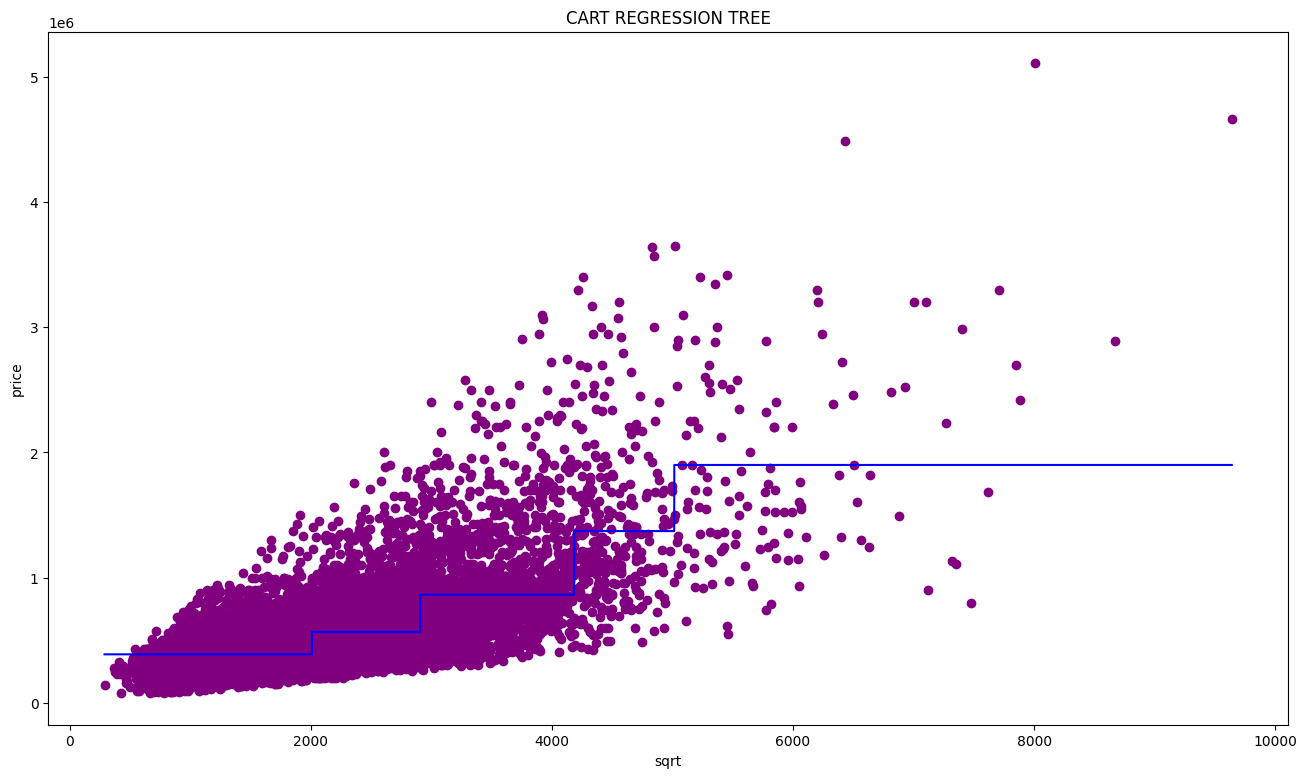

In [92]:
# max_leaf_nodes=5

plt.figure(figsize=[16, 9])
plt.title('CART REGRESSION TREE')
plt.xlabel('sqrt')
plt.ylabel('price')

X_grid = np.arange(min(np.array(pd.DataFrame(X_train["sqft_living"]))),
                   max(np.array(pd.DataFrame(X_train["sqft_living"]))), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(pd.DataFrame(X_train["sqft_living"]), y_train, color='purple')
plt.plot(X_grid,
         DecisionTreeRegressor(max_leaf_nodes=5).fit(pd.DataFrame(X_train["sqft_living"]), y_train).predict(X_grid),
         color='blue')

plt.show()

In [101]:
cart_params = {"max_depth": [5, 6, 7, 8, 9, 10, 15, 20],
               "min_samples_split": [5, 10, 15, 20, 25, 100]}

In [102]:
cart_cv_model = GridSearchCV(DecisionTreeRegressor(), cart_params, cv=10).fit(X_train, y_train)

In [103]:
cart_cv_model.best_params_

{'max_depth': 15, 'min_samples_split': 25}

In [104]:
tuned_cart_codel = DecisionTreeRegressor(max_depth=15, min_samples_split=25).fit(X_train, y_train)

In [105]:
np.sqrt(mean_squared_error(y_test, tuned_cart_codel.predict(X_test)))

173897.42703344513

In [112]:
np.sqrt(np.mean(-cross_val_score(tuned_cart_codel, X_test, y_test, cv=10, scoring="neg_mean_squared_error")))

197649.50375942246

### Artifical Neural Network

In [115]:
mlp_params = {"alpha": np.linspace(0.01, 0.1, 5, 10),
              "hidden_layer_sizes": [(10, 20), (20, 10), (100, 100)]}

In [116]:
mlp_cv_model = GridSearchCV(MLPRegressor(), mlp_params, cv=5).fit(X_train, y_train)

In [117]:
mlp_cv_model.best_params_

{'alpha': 0.01, 'hidden_layer_sizes': (100, 100)}

In [118]:
mlp_tuned = MLPRegressor(alpha=0.01, hidden_layer_sizes=(100, 100)).fit(X_train, y_train)

In [119]:
np.sqrt(mean_squared_error(y_test, mlp_tuned.predict(X_test)))

251979.84839662636

In [120]:
np.sqrt(np.mean(-cross_val_score(mlp_tuned, X_test, y_test, cv=10, scoring="neg_mean_squared_error")))

248847.05775007815

### SVR

In [131]:
params = np.arange(1, 9)
svr_params = {"C": params}

In [ ]:
svr_cv_model = GridSearchCV(SVR(), svr_params, cv=5).fit(X_train, y_train)

In [ ]:
svr_cv_model.best_params_

In [ ]:
svr_tuned = SVR(kernel="linear", C=1).fit(X_train, y_train)

In [ ]:
np.sqrt(mean_squared_error(y_test, svr_tuned.predict(X_test)))

In [ ]:
np.sqrt(np.mean(-cross_val_score(svr_tuned, X_test, y_test, cv=10, scoring="neg_mean_squared_error")))

### Random Forest

In [17]:
"""
rf_params = {"max_depth": [5, 10, 15, 20, 25, 50],
             "max_features": [2, 5, 10],
             "n_estimators": [200, 500, 1000, 2000],
             "min_samples_split": [1, 10, 100]}
"""
rf_params = {"max_features": [2, 5, 10],
             "n_estimators": [200, 500, 1000, 2000]}

In [19]:
rf_cv_model = GridSearchCV(RandomForestRegressor(), rf_params, cv=10, verbose=2, n_jobs=-1).fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


In [20]:
rf_cv_model.best_params_

{'max_features': 10, 'n_estimators': 2000}

In [21]:
rf_tuned = RandomForestRegressor(random_state=0, max_depth=10, n_estimators=2000).fit(X_train, y_train)

In [22]:
np.sqrt(mean_squared_error(y_test, rf_tuned.predict(X_test)))

145694.5639085555

In [23]:
np.sqrt(np.mean(-cross_val_score(rf_tuned, X_test, y_test, cv=10, scoring="neg_mean_squared_error")))

KeyboardInterrupt: 

### Gradient Boosting Machines - GBM

In [20]:
"""
gbm_params = {"learning_rate": [0.001, 0.1],
              "max_depth": [3, 5, 8, 20],
              "n_estimators": [100, 200, 500],
              "subsample": [1, 0.5, 0.8],
              "loss": ["ls", "lad", "quantile"]}
"""

gbm_params = {"learning_rate": [0.001, 0.1],
              "n_estimators": [500, 2000], }

In [21]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [22]:
gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv=10, verbose=2, n_jobs=-1).fit(X_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [27]:
gbm_cv_model.best_params_

{'learning_rate': 0.1, 'n_estimators': 2000}

In [28]:
gbm_tuned = GradientBoostingRegressor(learning_rate=0.1, n_estimators=2000).fit(X_train, y_train)

In [29]:
np.sqrt(mean_squared_error(y_test, gbm_tuned.predict(X_test)))

131723.33138400214

In [32]:
np.sqrt(
    np.mean(-cross_val_score(gbm_tuned, X_test, y_test, cv=10, scoring="neg_mean_squared_error", n_jobs=-1, verbose=2)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   52.9s remaining:   22.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.3min finished


131596.4282676823

### XGBoost

In [9]:
"""
xgb_params = {"learning_rate": [0.1,0.01,0.5], # aşırı öğrenmeyi engelleyecek parametre
             "max_depth": [2,3,4,5,8], # ağaç derinliği
             "n_estimators": [100,200,500,1000], # kullanılacak olan ağaç sayısı
             "colsample_bytree": [0.4,0.7,1] # oluşturlucak olan her ağaç için değişkenlerden alınacak olan alt küme oranı
              }
"""
xgb_params = {"learning_rate": [0.1, 0.01],
              "n_estimators": [500, 2000],
              "colsample_bytree": [0.5, 1]}

In [ ]:
xgb_cv_model = GridSearchCV(XGBRegressor(), xgb_params, cv=10, verbose=2, n_jobs=-1).fit(X_train, y_train)

In [38]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.5, 'learning_rate': 0.01, 'n_estimators': 2000}

In [11]:
xgb_tuned = XGBRegressor(colsample_bytree=0.5, learning_rate=0.01, n_estimators=2000).fit(X_train, y_train)

In [40]:
np.sqrt(mean_squared_error(y_test, xgb_tuned.predict(X_test)))

122936.61695053

In [41]:
np.sqrt(
    np.mean(-cross_val_score(xgb_tuned, X_test, y_test, cv=10, scoring="neg_mean_squared_error", n_jobs=-1, verbose=2)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   15.4s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   24.2s finished


128980.70570570313

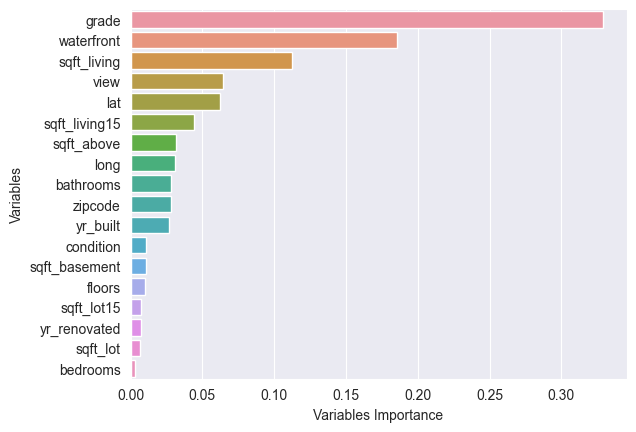

In [13]:
feature_imp = pd.Series(xgb_tuned.feature_importances_, index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Variables Importance')
plt.ylabel('Variables')
plt.show()

### LightGBM

In [42]:
lgbm_params = {"learning_rate": [0.001, 0.01, 0.1],
               "n_estimators": [500, 2000, 10000], }

In [43]:
lgbm_cv_model = GridSearchCV(LGBMRegressor(), lgbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


In [44]:
lgbm_cv_model.best_params_

{'learning_rate': 0.01, 'n_estimators': 10000}

In [45]:
tuned_lgbm = LGBMRegressor(learning_rate=0.01, n_estimators=10000).fit(X_train, y_train)

In [46]:
np.sqrt(mean_squared_error(y_test, tuned_lgbm.predict(X_test)))

123724.69277564081

In [47]:
np.sqrt(
    np.mean(
        -cross_val_score(tuned_lgbm, X_test, y_test, cv=10, scoring="neg_mean_squared_error", n_jobs=-1, verbose=2)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   38.8s remaining:   16.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   52.2s finished


135552.64308525357

### Catboost

In [67]:
catb_params = {"iterations": [500, 1000, 20000],  # ağaç sayısı
               "learning_rate": [0.01, 0.1], }

In [68]:
catb_cv_model = GridSearchCV(CatBoostRegressor(), catb_params, cv=5, n_jobs=-1).fit(X_train, y_train)

0:	learn: 339898.3189864	total: 3.17ms	remaining: 1m 3s
1:	learn: 337743.1315077	total: 6.5ms	remaining: 1m 4s
2:	learn: 335539.7015383	total: 9.25ms	remaining: 1m 1s
3:	learn: 333461.7553403	total: 12.3ms	remaining: 1m 1s
4:	learn: 331403.4025717	total: 15.1ms	remaining: 1m
5:	learn: 329308.1366051	total: 17.9ms	remaining: 59.8s
6:	learn: 327231.8105082	total: 21ms	remaining: 1m
7:	learn: 325255.7226645	total: 23.6ms	remaining: 59s
8:	learn: 323236.9384219	total: 26.5ms	remaining: 58.9s
9:	learn: 321250.6971451	total: 29.5ms	remaining: 59s
10:	learn: 319261.1001886	total: 32.5ms	remaining: 59.1s
11:	learn: 317267.4850545	total: 35.8ms	remaining: 59.7s
12:	learn: 315298.3513439	total: 38.6ms	remaining: 59.3s
13:	learn: 313359.3384813	total: 41.6ms	remaining: 59.4s
14:	learn: 311502.1496769	total: 44.8ms	remaining: 59.6s
15:	learn: 309645.5537408	total: 47.8ms	remaining: 59.7s
16:	learn: 307838.5858406	total: 51.1ms	remaining: 1m
17:	learn: 306065.7286427	total: 54ms	remaining: 60s
18:	

In [69]:
catb_cv_model.best_params_

{'iterations': 20000, 'learning_rate': 0.01}

In [70]:
catb_tuned = CatBoostRegressor(iterations=20000, learning_rate=0.01).fit(X_train, y_train)

0:	learn: 339898.3189864	total: 5.29ms	remaining: 1m 45s
1:	learn: 337743.1315077	total: 9.48ms	remaining: 1m 34s
2:	learn: 335539.7015383	total: 14ms	remaining: 1m 33s
3:	learn: 333461.7553403	total: 17.8ms	remaining: 1m 28s
4:	learn: 331403.4025717	total: 20.8ms	remaining: 1m 23s
5:	learn: 329308.1366051	total: 24ms	remaining: 1m 20s
6:	learn: 327231.8105082	total: 27.5ms	remaining: 1m 18s
7:	learn: 325255.7226645	total: 30.6ms	remaining: 1m 16s
8:	learn: 323236.9384219	total: 33.9ms	remaining: 1m 15s
9:	learn: 321250.6971451	total: 37.2ms	remaining: 1m 14s
10:	learn: 319261.1001886	total: 40.5ms	remaining: 1m 13s
11:	learn: 317267.4850545	total: 43.7ms	remaining: 1m 12s
12:	learn: 315298.3513439	total: 47ms	remaining: 1m 12s
13:	learn: 313359.3384813	total: 50.4ms	remaining: 1m 11s
14:	learn: 311502.1496769	total: 53.5ms	remaining: 1m 11s
15:	learn: 309645.5537408	total: 56.8ms	remaining: 1m 10s
16:	learn: 307838.5858406	total: 59.9ms	remaining: 1m 10s
17:	learn: 306065.7286427	tota

In [71]:
np.sqrt(mean_squared_error(y_test, catb_tuned.predict(X_test)))

119188.02335849708

In [72]:
np.sqrt(
    np.mean(
        -cross_val_score(catb_tuned, X_test, y_test, cv=10, scoring="neg_mean_squared_error", n_jobs=-1, verbose=2)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  3.4min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.3min finished


126996.49472740707